In [3]:
# check TensorRT version
print("TensorRT version: ")
!dpkg -l | grep nvinfer

TensorRT version: 
ii  libnvinfer5                             5.1.5-1+cuda10.1                    amd64        TensorRT runtime libraries


In [8]:
!pip install tflite_model_maker
##installing model maker

     |████████████████████████████████| 616 kB 5.1 MB/s 
     |████████████████████████████████| 237 kB 40.9 MB/s 
     |████████████████████████████████| 3.4 MB 41.2 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
     |████████████████████████████████| 1.2 MB 38.5 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 1.1 MB 39.6 MB/s 
     |████████████████████████████████| 120 kB 46.4 MB/s 
     |████████████████████████████████| 596 kB 49.6 MB/s 
     |████████████████████████████████| 6.4 MB 36.6 MB/s 
     |████████████████████████████████| 1.1 MB 30.9 MB/s 
     |████████████████████████████████| 840 kB 40.8 MB/s 
     |████████████████████████████████| 25.3 MB 61.3 MB/s 
     |████████████████████████████████| 47.8 MB 47 kB/s 
     |████████████████████████████████| 352 kB 44.3 MB/s 
     |████████████████████████████████| 99 kB 9.1 MB/s 
     |████████████████████████████████| 462 kB 47.0 MB/s 
     |███████████████

In [ ]:
!pip install tensorflow-gpu==2.0.0
!pip install tensorflow_hub

     |████████████████████████████████| 380.8 MB 36 kB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 3.8 MB 40.7 MB/s 
     |████████████████████████████████| 449 kB 54.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=6ee14e346af174f992449f487f2d7178b2881789c003690e76aa14c02cf73405
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [15]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [16]:
print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.0.0
Hub version:  0.12.0
Eager mode:  True
GPU is available


In [12]:

from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive/MyDrive/flowers



Mounted at /content/gdrive
daisy  dandelion  rose	sunflower  tulip


In [31]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/gdrive/MyDrive/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/gdrive/MyDrive/flowers/sunflower'
FLOWER_TULIP_DIR='/content/gdrive/MyDrive/flowers/tulip'
FLOWER_DANDI_DIR='/content/gdrive/MyDrive/flowers/dandelion'
FLOWER_ROSE_DIR='/content/gdrive/MyDrive/flowers/rose'

In [17]:
import os
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')    #flower photos download

In [18]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2) #Normalizing

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')#dividing image_size, batch_size

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [19]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape #each image is 224x224x4

((64, 224, 224, 3), (64, 5))

In [23]:
from time import time
#performing same process on the dataset
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [25]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.0.0


In [13]:
!pip install pyyaml h5py ##required to save model


In [26]:
# Run model training
from time import time
#performing same process on the dataset
start_opt = time()
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(val_generator.samples/val_generator.batch_size)

checkpoint_path = "training_1/cp.ckpt" ##training saves weights that are done during training
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
hist = model.fit(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch,
    callbacks=[cp_callback]).history
finish_opt = time()
f"Execution time with TensorFlow to train: {(finish_opt - start_opt):.2f} s"

Train for 46.0 steps, validate for 12.0 steps
Epoch 1/10
45/46 [============================>.] - ETA: 0s - loss: 1.0009 - acc: 0.6153
Epoch 00001: saving model to training_1/cp.ckpt
46/46 [==============================] - 30s 643ms/step - loss: 0.9918 - acc: 0.6199 - val_loss: 0.5643 - val_acc: 0.8003
Epoch 2/10
45/46 [============================>.] - ETA: 0s - loss: 0.5184 - acc: 0.8160
Epoch 00002: saving model to training_1/cp.ckpt
46/46 [==============================] - 20s 442ms/step - loss: 0.5220 - acc: 0.8146 - val_loss: 0.4508 - val_acc: 0.8468
Epoch 3/10
45/46 [============================>.] - ETA: 0s - loss: 0.4225 - acc: 0.8515
Epoch 00003: saving model to training_1/cp.ckpt
46/46 [==============================] - 20s 438ms/step - loss: 0.4198 - acc: 0.8527 - val_loss: 0.4146 - val_acc: 0.8618
Epoch 4/10
45/46 [============================>.] - ETA: 0s - loss: 0.3633 - acc: 0.8720
Epoch 00004: saving model to training_1/cp.ckpt
46/46 [==============================] -

'Execution time with TensorFlow to train: 223.41 s'

In [22]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [27]:

prediction = time()
final_loss, final_accuracy = model.evaluate(val_generator, steps = val_steps_per_epoch)
predictend = time() - prediction
f"Inference time with TensorFlow : {(predictend):.2f} s"

12/12 [==============================] - 4s 333ms/step - loss: 0.3343 - acc: 0.8824


'Inference time with TensorFlow : 4.52 s'

In [37]:
x =model.predict(val_generator)

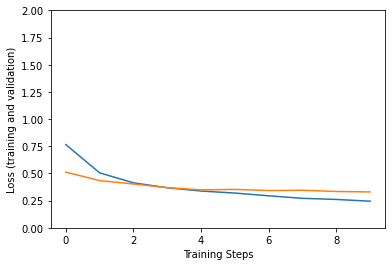

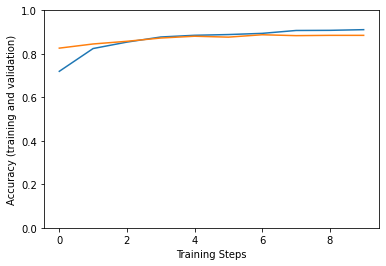

In [26]:
# Visualize training process

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

We are happy with our model’s performance, Now. export our model to  directory. This will export your model as a TFLite model. After that we'll do inference on reloaded model, so if you come with a model already trained, it'll be easier to inspect it.


In [28]:

model.save('my_model.h5')

In [30]:
from tensorflow.keras.models import load_model

# Load HDF5 file using path

# save as Tesorflow SavedModel
model.save("my_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [38]:
!pip install pillow matplotlib
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 42 kB/s 
     |████████████████████████████████| 449 kB 49.1 MB/s 
     |████████████████████████████████| 3.8 MB 22.0 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=efa64ca60f75998f51ae45825b3c137f024c7d9cf1b9b2c0da617e91395d27fc
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [2]:
%%bash
wget https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb

dpkg -i nvidia-machine-learning-repo-*.deb
apt-get update

sudo apt-get install libnvinfer5

(Reading database ... 155223 files and directories currently installed.)
Preparing to unpack nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb ...
Unpacking nvidia-machine-learning-repo-ubuntu1804 (1.0.0-1) over (1.0.0-1) ...
Setting up nvidia-machine-learning-repo-ubuntu1804 (1.0.0-1) ...
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
H

--2022-05-03 19:40:35--  https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2926 (2.9K) [application/x-deb]
Saving to: ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb.1’

     0K ..                                                    100% 73.6M=0s

2022-05-03 19:40:35 (73.6 MB/s) - ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb.1’ saved [2926/2926]

W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/nvidia-machine-learning.list:1 and /etc/apt/sources.list.d/nvidia-ml.list:1
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/nvidia-machine-learning.list:

In [4]:
from tensorflow.python.client import device_lib

def check_tensor_core_gpu_present():
    local_device_protos = device_lib.list_local_devices()
    for line in local_device_protos:
        if "compute capability" in str(line):
            compute_capability = float(line.physical_device_desc.split("compute capability: ")[-1])
            if compute_capability>=7.0:
                return True
    
print("Tensor Core GPU Present:", check_tensor_core_gpu_present())
tensor_core_gpu = check_tensor_core_gpu_present() ###check GPU

Tensor Core GPU Present: None


In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.compiler.tensorrt import trt_convert as trt
from tensorflow.python.saved_model import tag_constants
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [97]:
img_path = '/content/Sunflower_RingOfFire-2.jpeg' # Siberian_husky
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = tf.constant(x)

In [67]:
model = tf.keras.models.load_model('my_model')

In [96]:
t = time()
x = model.predict(val_generator)
print(np.argmax(x[0]))
print(np.argmax(val_generator[0][1]))
pr = time() - t
print("time taken:", pr)

0
0
time taken: 5.75362491607666


In [98]:
t = time()
model = tf.keras.models.load_model('my_model')
model.predict(x)
pr = time() - t
f"Inference time with TensorFlow : {(pr):.2f} s"

'Inference time with TensorFlow : 6.39 s'

In [48]:
print("Probab of class",x[0][0]*100)

Probab of class 95.18351554870605


In [35]:
import time
from tensorflow.python.saved_model import tag_constants

def benchmark_tftrt(saved_model_dir):
    saved_model_loaded = tf.saved_model.load(saved_model_dir, tags=[tag_constants.SERVING])
    infer = saved_model_loaded.signatures['serving_default']
    # convert to float32 and as tf constant
    batched_input = tf.constant(batched_input.astype("float32"))
    n_warmup_runs = 50
    n_runs = 1000

    # TensorRT requires a little steps to warmup for processing
    for i in range(n_warmup_runs):
      labeling = infer(batched_input)

    start_time = time.time()
    # run for 1000 steps with 8 batch size
    for i in range(n_runs):
      labeling = infer(batched_input)

    end_time = time.time()
    print('Throughput: {:.0f} images/s'.format(n_runs * batch_size / (end_time-start_time)))


In [49]:
print('Converting to TF-TRT FP32...')
conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(precision_mode=trt.TrtPrecisionMode.FP32,
                                                               max_workspace_size_bytes=8000000000)

converter = trt.TrtGraphConverterV2(input_saved_model_dir='my_model',
                                    conversion_params=conversion_params)
converter.convert()
converter.save(output_saved_model_dir='saved_model_TFTRT_FP32')
print('Done Converting to TF-TRT FP32')

Converting to TF-TRT FP32...
INFO:tensorflow:Linked TensorRT version: (5, 1, 5)


INFO:tensorflow:Linked TensorRT version: (5, 1, 5)


INFO:tensorflow:Loaded TensorRT version: (5, 1, 5)


INFO:tensorflow:Loaded TensorRT version: (5, 1, 5)


INFO:tensorflow:Running against TensorRT version 5.1.5


INFO:tensorflow:Running against TensorRT version 5.1.5


INFO:tensorflow:Assets written to: saved_model_TFTRT_FP32/assets


INFO:tensorflow:Assets written to: saved_model_TFTRT_FP32/assets


Done Converting to TF-TRT FP32


In [71]:
def predict_tftrt(input_saved_model,path):
    """Runs prediction on a single image and shows the result.
    input_saved_model (string): Name of the input model stored in the current dir
    """
    img_path = path # Siberian_husky
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x = tf.constant(x)
    
    saved_model_loaded = tf.saved_model.load(input_saved_model, tags=[tag_constants.SERVING])
    signature_keys = list(saved_model_loaded.signatures.keys())
    print(signature_keys)

    infer = saved_model_loaded.signatures['serving_default']
    print(infer.structured_outputs)

    labeling = infer(x)
    print(labeling)

In [84]:
st = time()
predict_tftrt('saved_model_TFTRT_FP32', '/content/download.jpeg')
en = time() - st

['serving_default']
{'output_1': TensorSpec(shape=<unknown>, dtype=tf.float32, name='output_1')}
{'output_1': <tf.Tensor: id=448549, shape=(1, 5), dtype=float32, numpy=
array([[0.07893876, 0.00082726, 0.82641995, 0.00813165, 0.08568238]],
      dtype=float32)>}


In [85]:
f"Inference time with TensorRT : {(en):.2f} s"

'Inference time with TensorRT : 4.70 s'

In [82]:
st = time()
predict_tftrt('saved_model_TFTRT_FP32', '/content/Sunflower_RingOfFire-2.jpeg')
en = time() - st

['serving_default']
{'output_1': TensorSpec(shape=<unknown>, dtype=tf.float32, name='output_1')}
{'output_1': <tf.Tensor: id=428390, shape=(1, 5), dtype=float32, numpy=
array([[0.1893578 , 0.01741163, 0.6915299 , 0.05297386, 0.04872669]],
      dtype=float32)>}


In [89]:
saved_model_loaded = tf.saved_model.load('saved_model_TFTRT_FP32', tags=[tag_constants.SERVING])
signature_keys = list(saved_model_loaded.signatures.keys())

In [90]:
img_path = '/content/Sunflower_RingOfFire-2.jpeg' # Siberian_husky
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = tf.constant(x)

In [91]:
t1=  time()
infer = saved_model_loaded.signatures['serving_default']
print(infer.structured_outputs)

labeling = infer(x)
print(labeling)
t2 = time()-t1

{'output_1': TensorSpec(shape=<unknown>, dtype=tf.float32, name='output_1')}
{'output_1': <tf.Tensor: id=468708, shape=(1, 5), dtype=float32, numpy=
array([[0.1893578 , 0.01741163, 0.6915299 , 0.05297386, 0.04872669]],
      dtype=float32)>}


In [93]:
f"Inference time with TensorRT : {(t2):.2f} s"

'Inference time with TensorRT : 0.23 s'

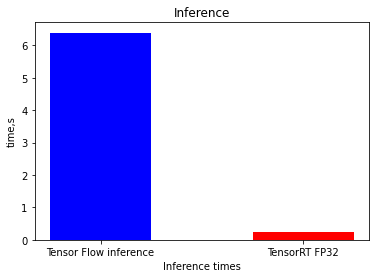

Performance Speedup:  27.591324139832853


In [100]:
import matplotlib.pyplot as plt
left = [1,2]
pred_times = [ pr, t2]
tick_label = ['Tensor Flow inference', 'TensorRT FP32']
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('Inference times'); plt.ylabel('time,s'); plt.title('Inference')
plt.savefig('outputneural.jpg')
plt.show()
print("Performance Speedup: ",(pr)/(t2))